## H5 SAMPLE CLASS
_Represent a sample save as h5 file_

In [21]:
import sys
import os
import h5py
import numpy as np
from scipy import signal
from math import ceil, sqrt, floor
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from dataset import Dataset

class H5Sample(Dataset):
    ''''''
    # Attributes
    __spec = None
    __target = None
    
    # Initializer
    def __init__(self, database_location, site, file):
        self.__file = file
        super(H5Sample, self).__init__(database_location, site, ext='.h5')
    #
    def get_file(self):
        return self.__file
        
    def get_database_location(self):
        return self.__database_name
    
    def get_spectrogram(self):
        return self.__spec
    
    def get_target(self):
        return self.__target
    
    def assert_spectrogram(self, force=False):
        if self.__spec is None or force:
            self.load_data()
            
    def load_data(self):
        '''Load one cut from the database'''
        sample = os.path.join(self.get_dataset_location(), self.get_site(), self.get_site()+'_data', self.__file)
        file = h5py.File(sample, 'r+')
        file_data = np.empty(file[sample].shape)
        file[sample].read_direct(file_data)
        cut = np.asarray(file_data)
        target = file[sample].attrs['target']
        file.close()
        self.__spec = cut
        self.__target = target
        return cut, target

    def spectrogram_plot(self, figsize=None, xlabel=None, ylabel=None, title=None, cmap='jet' ):
        self.assert_spectrogram()
        fig = plt.figure(figsize=figsize) if figsize else plt.figure(figsize=figsize)
        img = plt.pcolormesh(self.__spec, cmap=cmap)
        fig.colorbar(mappable=img)
        if xlabel:
            plt.xlabel(xlabel)
        if ylabel:
            plt.ylabel(ylabel)
        if title:
            plt.title(np.bool_(self.__target))
        plt.show()
        
    def spectrogram_hist(self, figsize=None, xlabel='Bins', ylabel='Quantity', title='Histogram'):
        '''Plot histrogram of spectrogram'''
        self.assert_spectrogram()
        
        fig = plt.figure(figsize=figsize) if figsize else plt.figure(figsize=figsize)
        if xlabel:
            plt.xlabel(xlabel)
        if ylabel:
            plt.ylabel(ylabel)
        if title:
            plt.title(title)
        plt.hist(self.__spec.flatten(), bins='auto')
        plt.show()


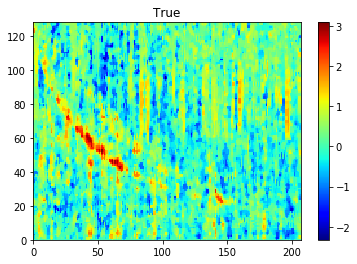

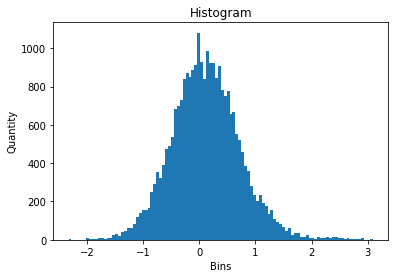

In [33]:
# database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
# site = 'marion'
# my_dataset = Dataset(database_loc, site, ext='.h5')
# h5_sample = H5Sample(database_loc, site, my_dataset.get_random_sample())
# h5_sample.spectrogram_plot(title=True)
# h5_sample.spectrogram_hist()